/tmp/ipykernel_11026/78810135.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rate_(out_of_5)', y='cuisines_type', data=cuisine_rating.head(10), palette='viridis')


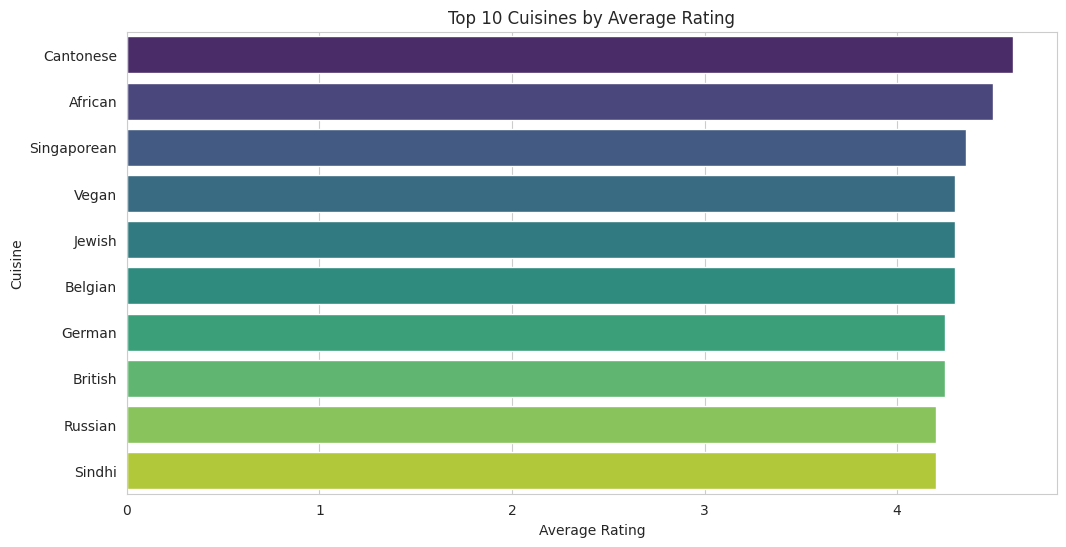

/tmp/ipykernel_11026/78810135.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_of_ratings', y='cuisines_type', data=cuisine_ratings_count.head(10), palette='viridis')


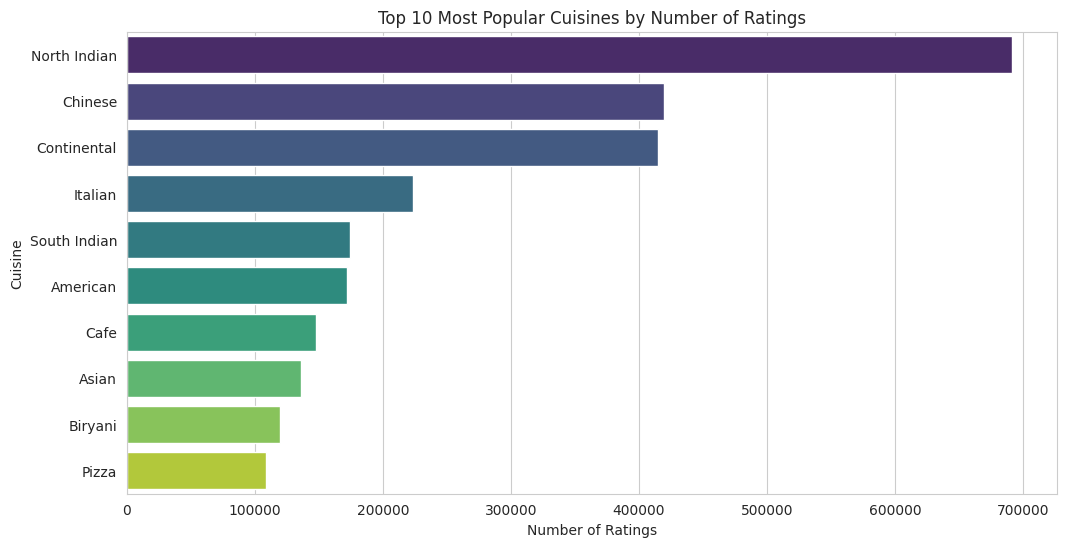

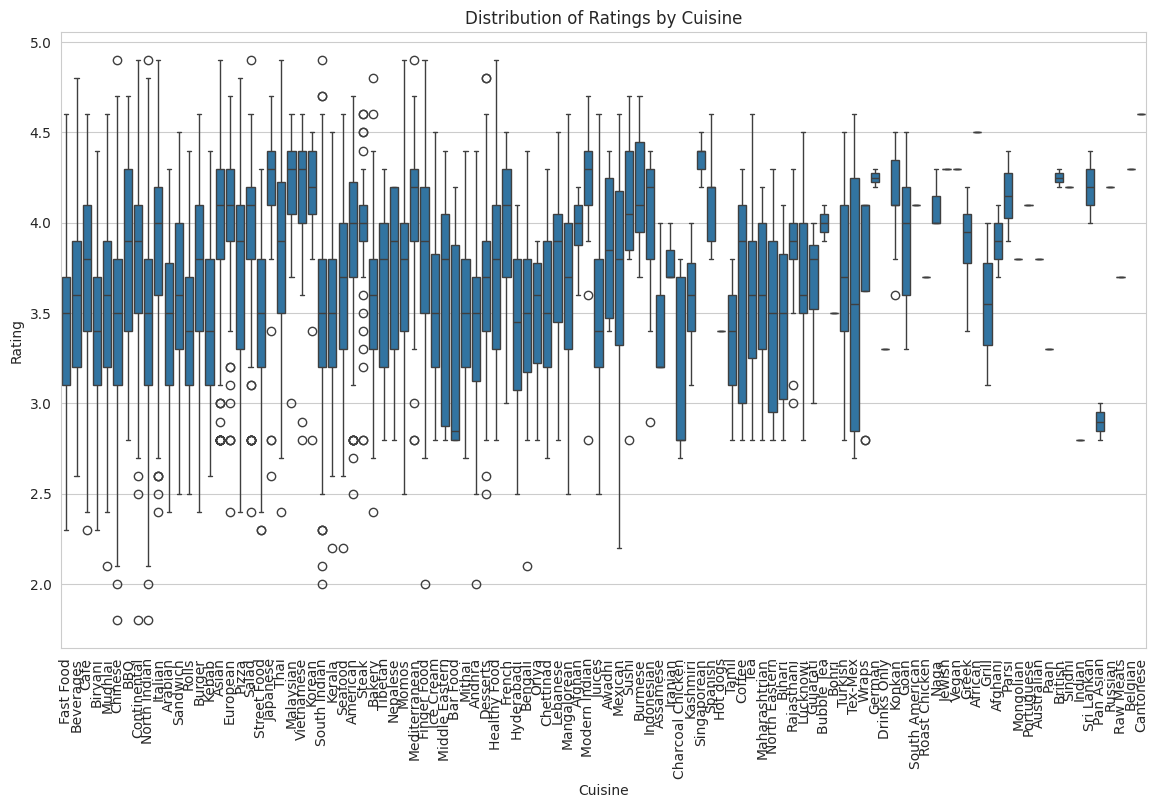


Top 10 Cuisines by Average Rating:
    cuisines_type  rate_(out_of_5)
24      Cantonese             4.60
2         African             4.50
89    Singaporean             4.36
103         Vegan             4.30
50         Jewish             4.30
13        Belgian             4.30
36         German             4.25
19        British             4.25
84        Russian             4.20
88         Sindhi             4.20

Top 10 Most Popular Cuisines by Number of Ratings:
   cuisines_type  num_of_ratings
73  North Indian          691838
27       Chinese          419687
29   Continental          414597
48       Italian          223673
91  South Indian          174440
3       American          171874
23          Cafe          147837
6          Asian          136448
17       Biryani          119793
78         Pizza          108796

Cuisines with Above-Average Ratings:
     cuisines_type  rate_(out_of_5)
24       Cantonese         4.600000
2          African         4.500000
89     Singaporean

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "zomato.csv"  # Ensure the correct file path
data = pd.read_csv(file_path)

# Standardizing column names (remove spaces, lowercase)
data.columns = [col.strip().replace(' ', '_').lower() for col in data.columns]

# Check if necessary columns exist
required_columns = ['cuisines_type', 'rate_(out_of_5)', 'num_of_ratings']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print(f"❌ Error: Missing columns: {missing_columns}")
else:
    # Handle missing values
    data = data.dropna(subset=['cuisines_type', 'rate_(out_of_5)'])

    # Convert ratings to numeric (handle 'NEW' or other non-numeric values)
    data['rate_(out_of_5)'] = pd.to_numeric(data['rate_(out_of_5)'], errors='coerce')
    data = data.dropna(subset=['rate_(out_of_5)'])

    # Explode cuisines_type column to analyze individual cuisines
    data['cuisines_type'] = data['cuisines_type'].str.split(', ')
    data = data.explode('cuisines_type')

    # Analyze cuisines by average rating
    cuisine_rating = data.groupby('cuisines_type')['rate_(out_of_5)'].mean().reset_index()
    cuisine_rating = cuisine_rating.sort_values(by='rate_(out_of_5)', ascending=False)

    # Analyze cuisines by popularity (number of ratings)
    cuisine_ratings_count = data.groupby('cuisines_type')['num_of_ratings'].sum().reset_index()
    cuisine_ratings_count = cuisine_ratings_count.sort_values(by='num_of_ratings', ascending=False)

    # Find cuisines with above-average ratings
    average_rating = data['rate_(out_of_5)'].mean()
    high_rating_cuisines = cuisine_rating[cuisine_rating['rate_(out_of_5)'] >= average_rating]

    # --- Visualization ---
    sns.set_style('whitegrid')

    # Top 10 cuisines by average rating
    plt.figure(figsize=(12, 6))
    sns.barplot(x='rate_(out_of_5)', y='cuisines_type', data=cuisine_rating.head(10), palette='viridis')
    plt.title('Top 10 Cuisines by Average Rating')
    plt.xlabel('Average Rating')
    plt.ylabel('Cuisine')
    plt.show()

    # Top 10 cuisines by number of ratings
    plt.figure(figsize=(12, 6))
    sns.barplot(x='num_of_ratings', y='cuisines_type', data=cuisine_ratings_count.head(10), palette='viridis')
    plt.title('Top 10 Most Popular Cuisines by Number of Ratings')
    plt.xlabel('Number of Ratings')
    plt.ylabel('Cuisine')
    plt.show()

    # Boxplot of ratings by cuisine
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='cuisines_type', y='rate_(out_of_5)', data=data)
    plt.xticks(rotation=90)
    plt.title('Distribution of Ratings by Cuisine')
    plt.xlabel('Cuisine')
    plt.ylabel('Rating')
    plt.show()

    # --- Display results ---
    print("\nTop 10 Cuisines by Average Rating:")
    print(cuisine_rating.head(10))

    print("\nTop 10 Most Popular Cuisines by Number of Ratings:")
    print(cuisine_ratings_count.head(10))

    print("\nCuisines with Above-Average Ratings:")
    print(high_rating_cuisines)
